In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import decomposition
from sklearn.datasets import fetch_olivetti_faces
from numpy.random import RandomState
from keras.datasets import mnist
from keras.utils import np_utils

In [31]:
(train_feature, train_label),\
(test_feature, test_label) = mnist.load_data()  

In [32]:
train_feature_vector =train_feature.reshape(len(train_feature), 784).astype('float32')
test_feature_vector = test_feature.reshape(len( test_feature), 784).astype('float32')

In [33]:
n_row, n_col = 10, 6 #设置图像展示时的排列情况
n_components = n_row * n_col #设置提取的特征的数目
image_shape = (28, 28) #设置人脸数据图片的大小
img = train_feature_vector #加载数据，并打乱顺序

In [34]:
def plot_gallery(title, images, n_col=n_col, n_row=n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row)) 
    plt.suptitle(title, size=16)

    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())

        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
                   interpolation='nearest', vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.94, 0.04, 0.)

In [35]:
estimators = [
    ('Eigenfaces - PCA using randomized SVD',
         decomposition.PCA(n_components=60,whiten=True)),

    ('Non-negative components - NMF',
         decomposition.NMF(n_components=60, init='nndsvda', tol=5e-3))
]

Extracting the top 60 Eigenfaces - PCA using randomized SVD...
(60000, 784)
Extracting the top 60 Non-negative components - NMF...
(60000, 784)


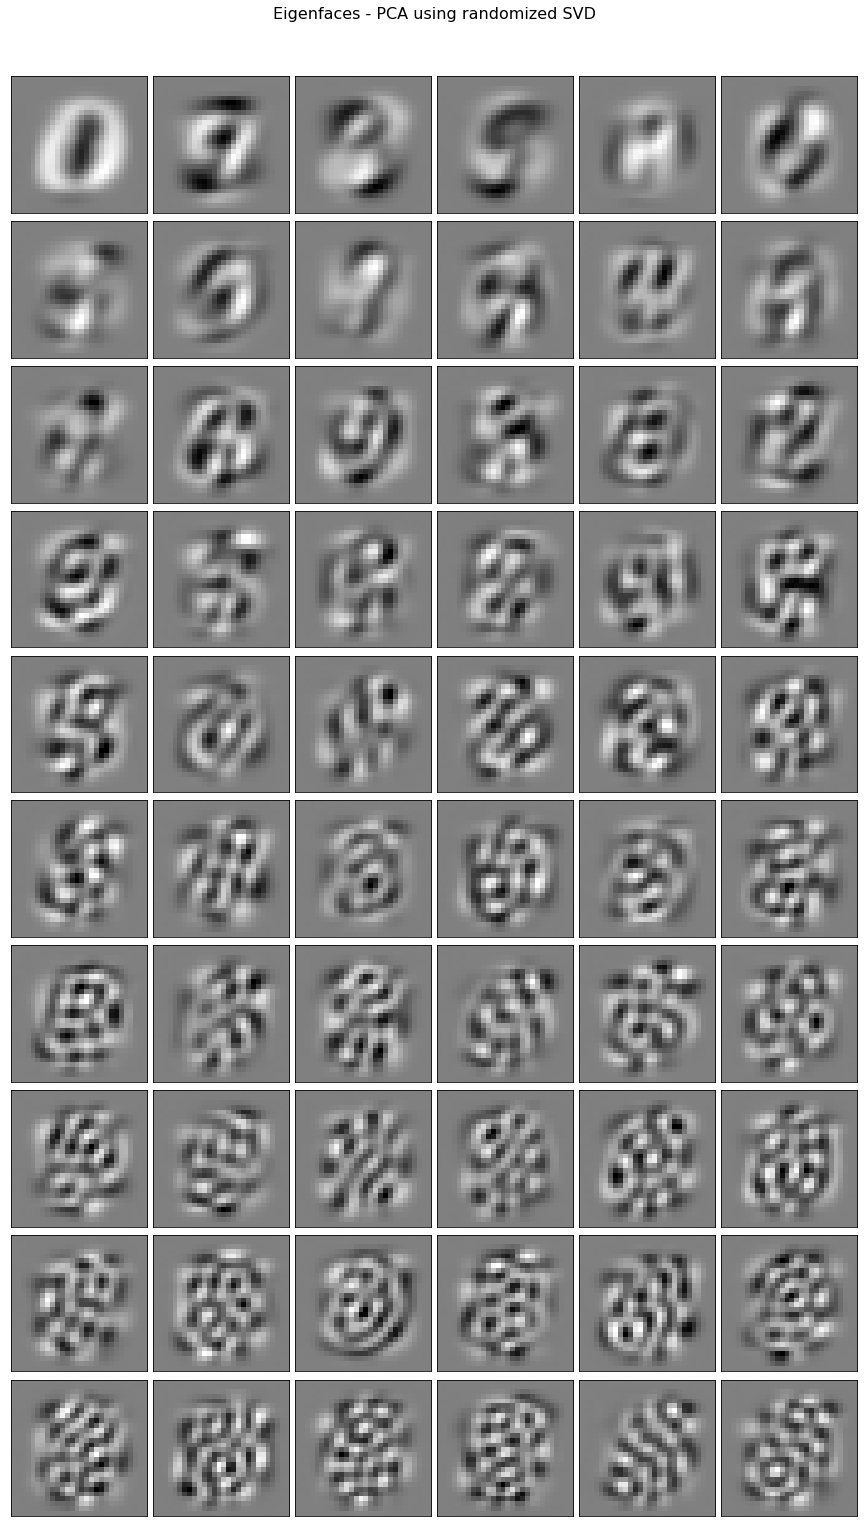

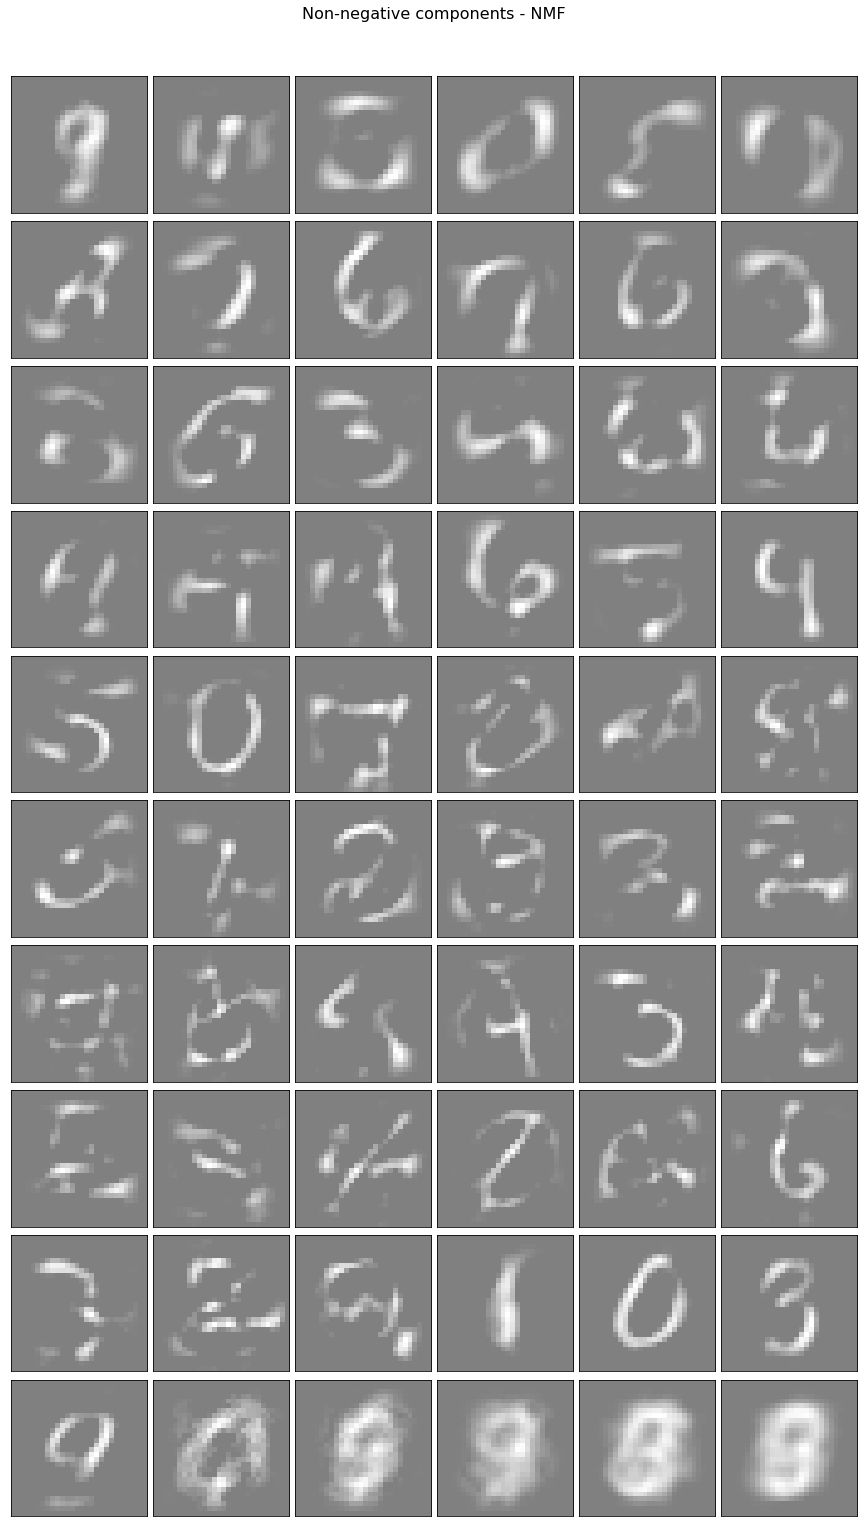

In [36]:
for name, estimator in estimators:
    print("Extracting the top %d %s..." % (n_components, name))
    print(img.shape)
    estimator.fit(img)
    components_ = estimator.components_
    plot_gallery(name, components_[:n_components])

plt.show()

In [37]:
X_TRAIN = np.reshape(train_feature,(60000,784))
X_TEST = np.reshape(test_feature,(10000,784))
X_TRAIN = X_TRAIN/255
X_TEST = X_TEST/255
print("Shape of Train Data: {}".format(X_TRAIN.shape))
print("Shape of Train Data: {}".format(X_TEST.shape))

pca = decomposition.PCA(32)
pca.fit(X_TRAIN)
TRAIN= pca.transform(X_TRAIN)
TEST = pca.transform(X_TEST)
approximation = pca.inverse_transform(TEST)



Shape of Train Data: (60000, 784)
Shape of Train Data: (10000, 784)


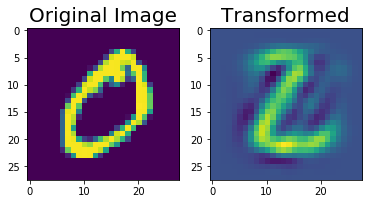

In [38]:
#plt.figure(figsize=(8,4));

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(X_TRAIN[1].reshape(28,28))
#plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 154 principal components
plt.subplot(1, 2, 2);
plt.imshow(approximation[1].reshape(28, 28))
#plt.xlabel('154 components', fontsize = 14)
plt.title('Transformed', fontsize = 20);

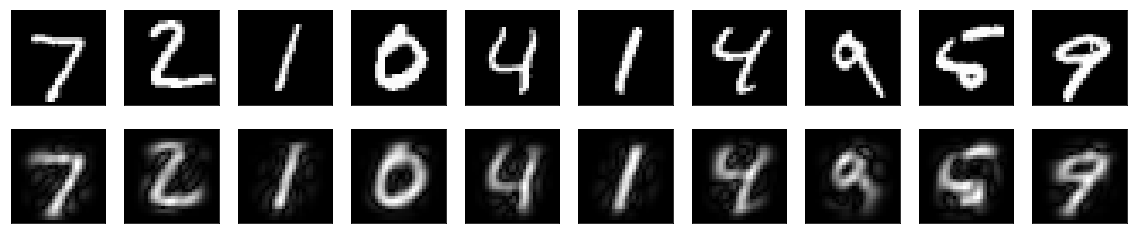

In [40]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_TEST[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(np.abs(approximation[i]).reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()